 <span style="font-size:19pt;">Name: Lamine Deen</span>

In [5]:
import numpy as np
import pandas as pd

# filepath for dataset
file_path = 'aneurysm.npy'

# Load the .npy file
loaded_data = np.load(file_path)

# Print the loaded data
print("Contents of the .npy file:")
print(loaded_data)


Contents of the .npy file:
[[-9.12895e-03 -9.12895e-03 -9.12895e-03 ...  5.63950e-04 -7.54141e-03
  -8.53997e-03]
 [-4.99267e-04 -4.96340e-04 -4.83251e-04 ... -2.76780e-04 -4.74289e-05
   6.09793e-05]
 [-5.41389e-05  1.07960e-04 -2.54116e-04 ...  8.20211e-04 -9.95218e-04
  -9.96361e-04]]


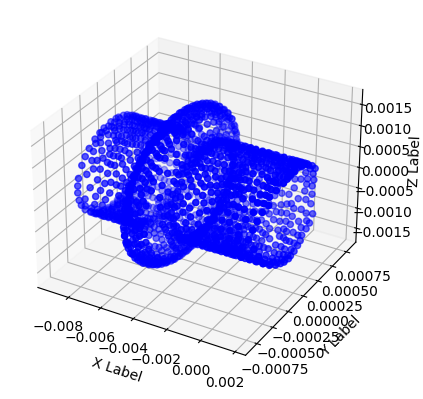

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# Load data from .npy file
file_path = 'aneurysm.npy'
data = np.load(file_path)

# Check the shape of the loaded data
if data.shape[0] != 3:
    raise ValueError("The data should have three arrays for X, Y, and Z coordinates.")

# Extract X, Y, and Z coordinates
x_coords, y_coords, z_coords = data

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o')

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


 <span style="font-size:16pt;">2. b)</span>

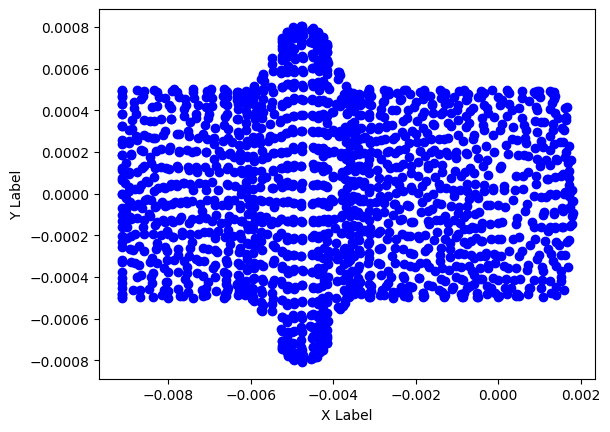

In [7]:
# Create a 2D plot ignoring the z values
plt.scatter(x_coords, y_coords, c='b', marker='o')

# Set labels for each axis
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Show the plot
plt.show()

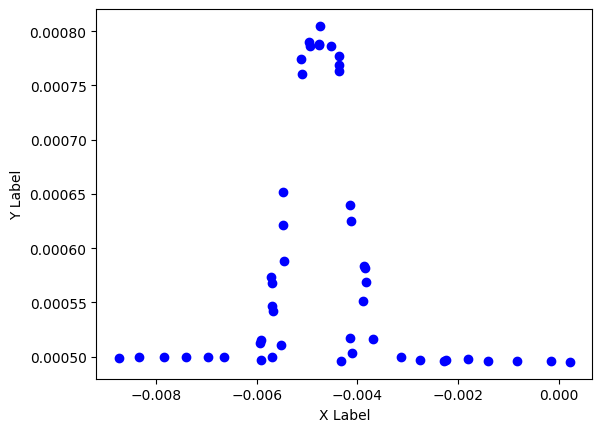

In [8]:
# Find unique x values and corresponding max y values
unique_x, indices = np.unique(x_coords, return_index=True)
x_max = x_coords[indices]
y_max = y_coords[indices]
z_max = z_coords[indices]

# Filter points with negative y coordinates
positive_y_indices = np.where(y_max >= 0.000495)
x_coords_filtered = x_max[positive_y_indices]
y_coords_filtered = y_max[positive_y_indices]
z_coords_filtered = z_max[positive_y_indices]



# Create boolean masks to filter points within range
mask_x_range = (x_coords_filtered < -0.0053) | (x_coords_filtered > -0.0042)
mask_y_range = (y_coords_filtered < 0.00050) | (y_coords_filtered > 0.00076)

# Combine masks to get the final mask for points to include
final_mask = mask_x_range | mask_y_range

# Filter data based on the final mask for easier line fitting
x_filtered = x_coords_filtered[final_mask]
y_filtered = y_coords_filtered[final_mask]

# Create a scatter plot for filtered data
plt.scatter(x_filtered, y_filtered, c='b', marker='o')

# Set labels for each axis
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Show the plot
plt.show()


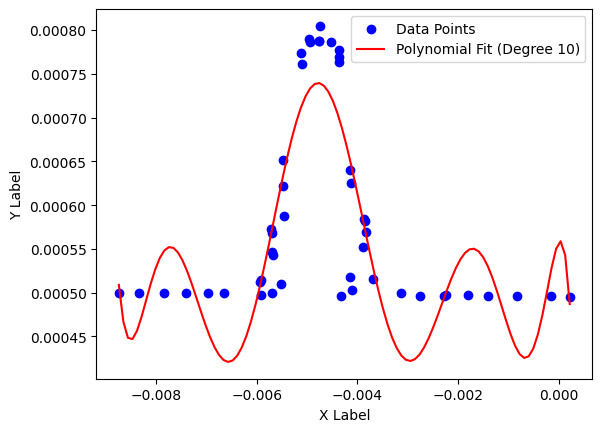

In [9]:
# Choose the polynomial degree for fitting
degree= 10

# Fit a polynomial using polyfit
coefficients = np.polyfit(x_filtered, y_filtered, degree)

# Create a polynomial using the coefficients
poly = np.poly1d(coefficients)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_filtered), max(x_filtered), 100)

# Evaluate the polynomial for the fitted line
y_fit = poly(x_fit)

# Plot the filtered data points
plt.scatter(x_filtered, y_filtered, c='b', marker='o', label='Data Points')

# Plot the fitted line
plt.plot(x_fit, y_fit, c='r', label=f'Polynomial Fit (Degree {degree})')

# Set labels for each axis
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Add a legend
plt.legend()

# Show the plot
plt.show()

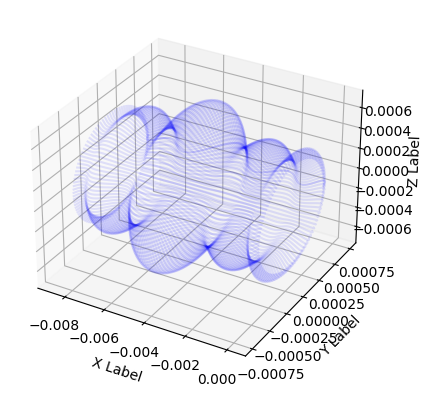

In [10]:
from sklearn.model_selection import train_test_split
# Generate points for the polynomial line
x_polyfit = np.linspace(min(x_filtered), max(x_filtered), 100)
y_polyfit = np.polyval(coefficients, x_polyfit)

# Create a 3D plot for washer method
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define rotation parameters
theta = np.linspace(0, 2 * np.pi, 100)
radius = y_polyfit  # Use the polynomial values as the radius

# Create arrays to store the coordinates
all_coordinates = []

# Create washer slices and rotate
for angle in theta:
    x_washer = x_polyfit
    y_washer = radius * np.cos(angle)
    z_washer = radius * np.sin(angle)
    ax.plot(x_washer, y_washer, z_washer, color='b', alpha=0.1)

    coordinates = np.column_stack((x_washer, y_washer, z_washer))
    all_coordinates.extend(coordinates)

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the 3D plot
plt.show()

# Save the coordinates to a file
np.savetxt('rotated_surface_coordinates.txt', all_coordinates, fmt='%.6f', delimiter=', ', header='x, y, z')

# Convert the list to a NumPy array
all_coordinates = np.array(all_coordinates)

# Perform train-test split using the coordinates from all_coordinates list
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((all_coordinates[:, 0], all_coordinates[:, 1])), all_coordinates[:, 2], test_size=0.25, random_state=42)


# # Print the first few training and testing samples
# print("\nTraining samples:")
# print(np.column_stack((X_train, y_train)))

# print("\nTesting samples:")
# print(np.column_stack((X_test, y_test)))
# print(X_train)
# print(type(X_train))

# print(y_train)
# print(type(y_train))

 <span style="font-size:16pt;">2. c)</span>

In [11]:
import copy
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# create a RBF network class
class GaussianRBFnetwork:
    # initialize the model
    def __init__(self, d, M, alpha = 0.001, initialization = 'uniform'):
        # the dimension of the datapoints
        self.d = d
        
        # the number of radial basis functions
        self.M = M
                
        # the learning rate
        self.alpha = alpha
        
        # initialize the parameters
        if initialization == 'uniform':
            theta = 10 * np.random.uniform(-1, 1, size = (M + 1))
            lam = 10 * np.random.uniform(0, 1, size = (M))
            xi = 10 * np.random.uniform(-1, 1, size = (M, d))

        # save the initial parameters
        self.theta = theta
        self.lam = lam
        self.xi = xi
                
    # fit the model to some data X with labels y
    def fit(self, X, y, epochs = 1000, update = 10, annealing = False):
        self.n = X.shape[0]
        
        # save the training data
        self.input = np.hstack((np.ones([self.n, 1]), X))
        
        # save the training labels
        self.output = y
        
        # initialize the kernel-weighted inputs
        XK = np.zeros([self.n, self.M])
        XK = np.hstack((np.ones([self.n, 1]), XK))
        
        # save the learning rate locally
        alpha = copy.copy(self.alpha)
        
        # run gradient descent with exact gradient
        # pre-compute terms
        for j in range(epochs):
            # compute the kernel-weighted inputs
            for i in range(self.n):
                for k in range(self.M):
                    XK[i, k + 1] = self.GaussianKernel(self.input[i, 1:], self.xi[k], self.lam[k])
                        
            # training predictions
            predictions = XK @ self.theta
            
            # compute the error
            error = predictions - self.output

            # compute the weighted error
            weightederror = np.atleast_2d(error).T * XK
            
            # compute the theta partial derivatives
            thetagrad = np.sum(weightederror, axis = 0)
            
            # compute the lambda partial derivatives
            term3 = np.zeros([self.n, self.M])
            for k in range(self.M):
                term3[:, k] = ((np.linalg.norm(self.xi[k] - self.input[:,1:], axis = 1)/self.lam[k]) ** 2 - 1) * self.theta[k]/self.lam[k]
            
            lamerror = term3 * weightederror[:, 1:]
            lamgrad = np.sum(lamerror, axis = 0)

            # compute the xi partial derivatives
            term4 = np.zeros([self.n, self.M, self.d])
            for k in range(self.M):
                for l in range(self.d):
                    term4[:, k, l] = (self.input[:, l] - self.xi[k, l]) * self.theta[k] / self.lam[k] ** 2

            xierror = term4 * np.atleast_3d(weightederror[:, 1:])
            xigrad = np.sum(xierror, axis = 0)
            
            # weight update
            self.theta -= self.alpha * thetagrad
            self.lam -= self.alpha * lamgrad
            self.xi -= self.alpha * xigrad

            # ensure lambdas are positive
            self.lam = np.abs(self.lam)
                        
            # if the annealing variable is True, shrink the learning rate over time
            if annealing:
                self.alpha = (1 - j / epochs) * alpha
                
            # print a status update periodically
            if j % update == 0:
                print('Epoch', j, '\tLoss =', np.sum(error ** 2)/self.M)

    # compute predictions
    def predict(self, X):
        n = X.shape[0]
        X = np.hstack((np.ones([n, 1]), X))
        
        # initialize the kernel-weighted inputs
        XK = np.zeros([n, self.M])
        XK = np.hstack((np.ones([n, 1]), XK))
        
        # compute the kernel-weighted inputs
        for i in range(n):
            for k in range(self.M):
                XK[i, k + 1] = self.GaussianKernel(X[i, 1:], self.xi[k], self.lam[k])
                
        # training predictions
        predictions = XK @ self.theta

        return predictions
    
    # the Gaussian radial basis function
    def GaussianKernel(self, x, xi, lam):
        return (1/lam) * np.exp(-np.linalg.norm(x - xi) ** 2 / (2 * lam ** 2))

Epoch 0 	Loss = 8461.962523963322
Epoch 50 	Loss = 114.70336513882788
Epoch 100 	Loss = 188.9705081257267
Epoch 150 	Loss = 3.85566594865679
Epoch 200 	Loss = 3.6650888925083067
Epoch 250 	Loss = 3.5003141128996247
Epoch 300 	Loss = 3.3578274295655675
Epoch 350 	Loss = 3.234915270513534
Epoch 400 	Loss = 3.129548543057504
Epoch 450 	Loss = 3.0403013618985892
Epoch 500 	Loss = 2.9663098457617942
Epoch 550 	Loss = 2.907278742451431
Epoch 600 	Loss = 2.8635507163789367
Epoch 650 	Loss = 2.8362666501126235
Epoch 700 	Loss = 2.8276684079467307
Epoch 750 	Loss = 2.8416262565933486
Epoch 800 	Loss = 2.884454858515439
Epoch 850 	Loss = 2.965538752876488
Epoch 900 	Loss = 3.092441975271033
Epoch 950 	Loss = 3.215209855917127


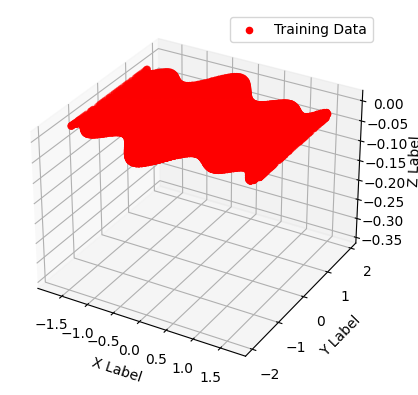

In [13]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create and fit the GaussianRBFnetwork with scaled features
rbf_model = GaussianRBFnetwork(d=2, M=10, alpha=0.0001, initialization='uniform')
rbf_model.fit(X_train_scaled, y_train, epochs=1000, update=50, annealing=False)

# Plot the 3D surface representing a cylindrical shape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for plotting
theta = np.linspace(0, 2 * np.pi, 100)
z_mesh = np.linspace(min(y_train), max(y_train), 100)
theta_mesh, z_mesh = np.meshgrid(theta, z_mesh)

# Convert meshgrid to Cartesian coordinates
x_mesh = np.cos(theta_mesh)
y_mesh = np.sin(theta_mesh)

# Stack the meshgrid points into a single array
mesh_points = np.column_stack((x_mesh.flatten(), y_mesh.flatten()))

# Scale the meshgrid points
mesh_points_scaled = scaler.transform(mesh_points)

# Predict the surface values for the scaled meshgrid
z_pred = rbf_model.predict(mesh_points_scaled)
z_mesh = z_pred.reshape(x_mesh.shape)

# Plot the surface representing a cylindrical shape
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0.7)

# Scatter plot of the training data points
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train, color='red', marker='o', label='Training Data')

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add legend
ax.legend()

# Show the 3D plot
plt.show()

# Scale the test set features
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on the scaled test set
predictions_test = rbf_model.predict(X_test_scaled)

# # Evaluate the model performance using metrics
# from sklearn.metrics import mean_squared_error, r2_score

# mse = mean_squared_error(y_test, predictions_test)
# r2 = r2_score(y_test, predictions_test)

# print("Mean Squared Error on Test Set:", mse)
# print("R-squared on Test Set:", r2)

In [15]:
# # Generate synthetic 3D data
# np.random.seed(42)
# n_samples = 100
# X_train = 10 * np.random.rand(n_samples, 3)
# y_train = np.sin(X_train[:, 0]) + np.cos(X_train[:, 1]) + np.random.normal(0, 0.1, size=n_samples)

# # Create GaussianRBFnetwork model
# d = 3  # Dimension of the data
# M = 10  # Number of radial basis functions
# rbf_model = GaussianRBFnetwork(d=d, M=M)

# # Fit the model to the data
# rbf_model.fit(X_train, y_train, epochs=1000, update=10, annealing=True)

# # Generate test data for visualization
# n_test_samples = 50
# x_test = np.linspace(0, 10, n_test_samples)
# y_test = np.linspace(0, 10, n_test_samples)
# z_test = np.linspace(0, 10, n_test_samples)
# X_test = np.array(np.meshgrid(x_test, y_test, z_test)).T.reshape(-1, 3)

# # Make predictions on test data
# predictions = rbf_model.predict(X_test)

# # Visualize the learned surface
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Training Data')
# ax.scatter(X_test[:, 0], X_test[:, 1], predictions, color='red', label='Predictions')

# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# ax.set_title('Learned Surface with Gaussian RBF Network')

# plt.legend()
# plt.show()